C:\Users\sumsa\AppData\Local\Temp\ipykernel_26532\101338086.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_data_cleaned['Genres'] = games_data_cleaned['Genres'].apply(literal_eval)
C:\Users\sumsa\AppData\Local\Temp\ipykernel_26532\101338086.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_stats_sorted, x='Count', y='Genres', palette=palette)
C:\Users\sumsa\AppData\Local\Temp\ipykernel_26532\101338086.py:46: UserWarning: 
The palette list has fewer values (6) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=genre_stats_sorted, 

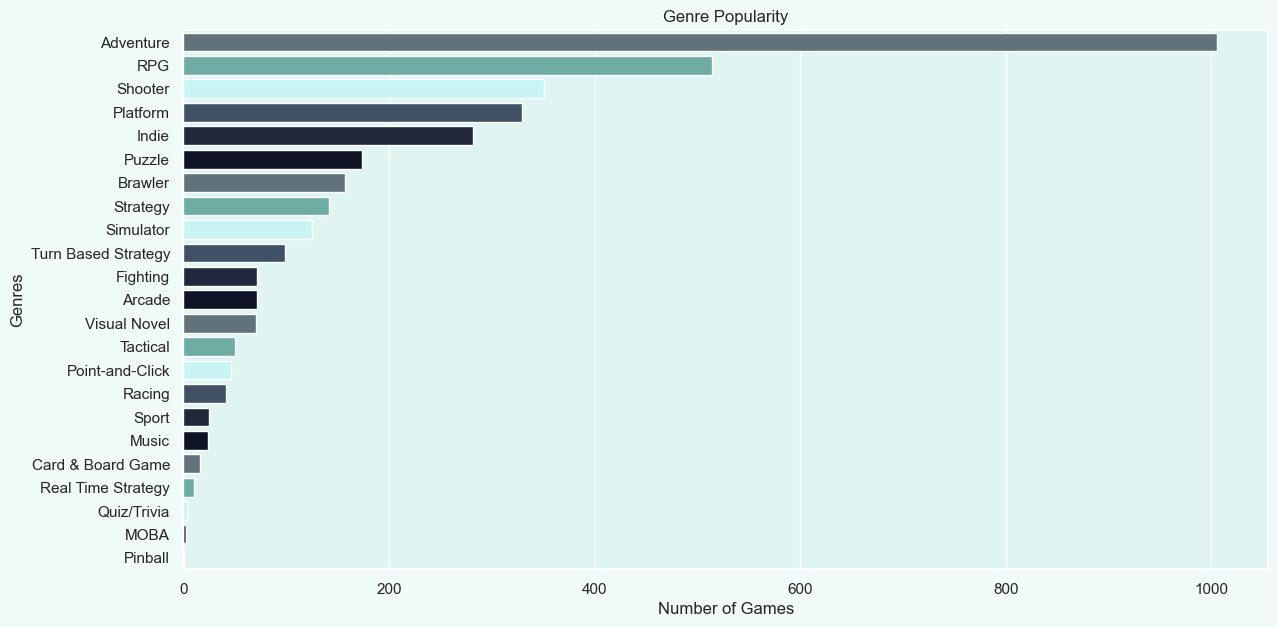

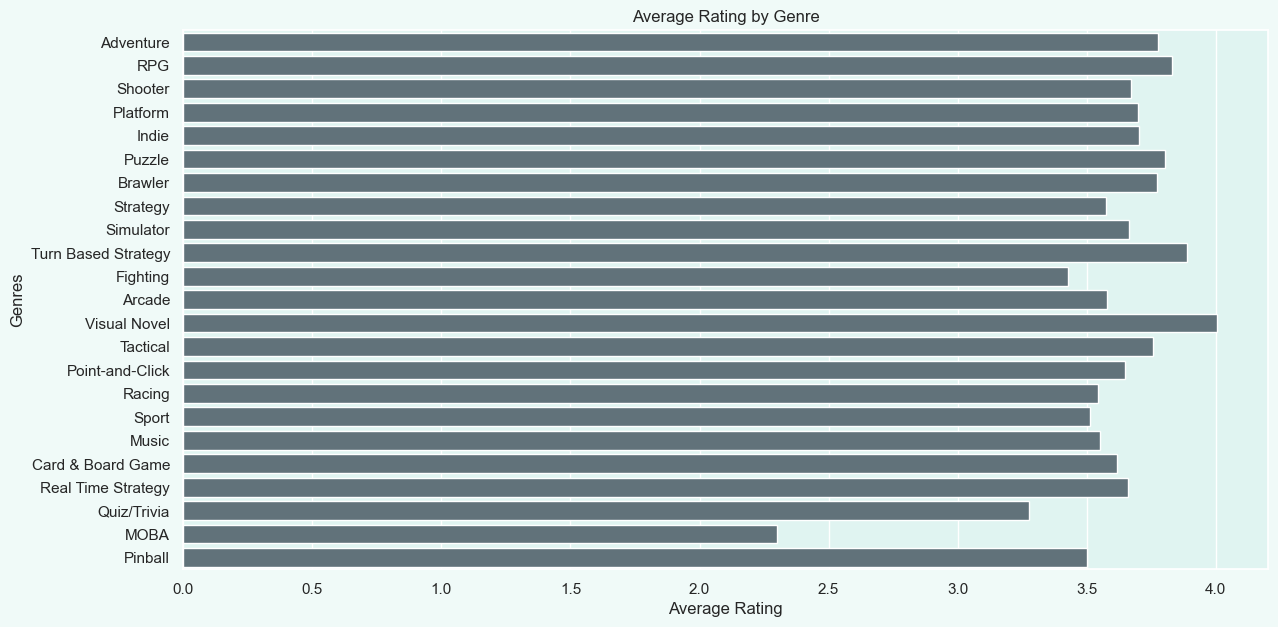

C:\Users\sumsa\AppData\Local\Temp\ipykernel_26532\101338086.py:67: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=games_data_cleaned, x='Rating',


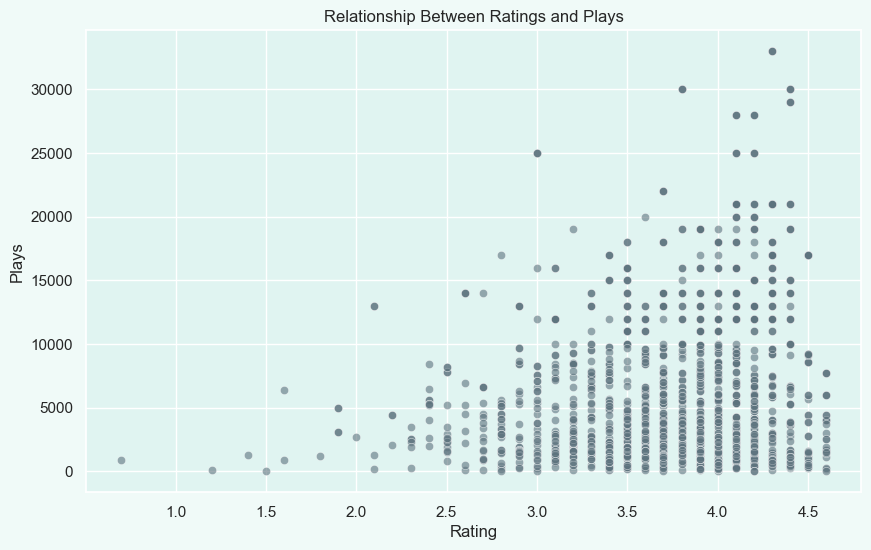

C:\Users\sumsa\AppData\Local\Temp\ipykernel_26532\101338086.py:77: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=games_data_cleaned, x='Rating',


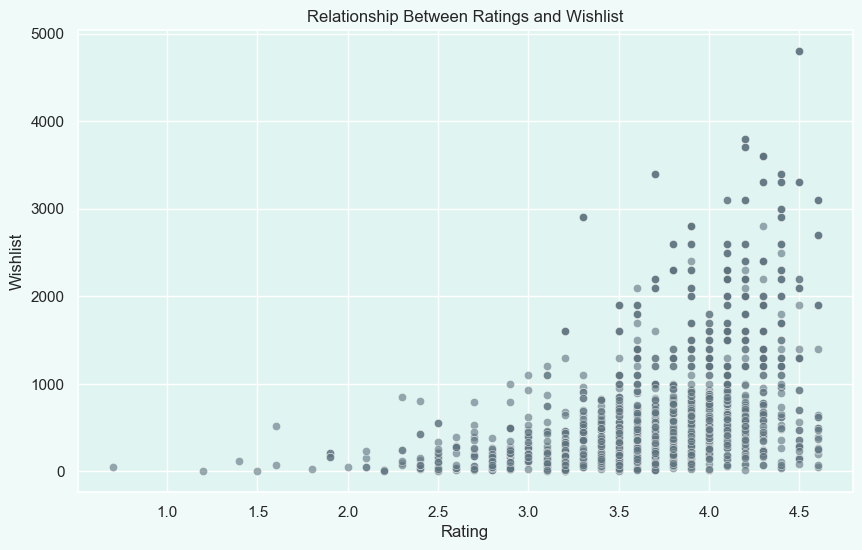

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from ast import literal_eval

file_path = './games.csv'
games_data = pd.read_csv(file_path)
games_data['Release Date'] = pd.to_datetime(
    games_data['Release Date'], errors='coerce')
games_data['Release Year'] = games_data['Release Date'].dt.year


def convert_k_to_number(text):
    if 'K' in text:
        return float(text.replace('K', '')) * 1000
    return float(text)


numeric_fields = ['Times Listed', 'Number of Reviews',
                  'Plays', 'Playing', 'Backlogs', 'Wishlist']
for field in numeric_fields:
    games_data[field] = games_data[field].apply(convert_k_to_number)

games_data_cleaned = games_data.dropna(subset=['Release Year', 'Rating'])

games_data_cleaned['Genres'] = games_data_cleaned['Genres'].apply(literal_eval)
exploded_genres = games_data_cleaned.explode('Genres')

genre_stats = exploded_genres.groupby('Genres').agg(
    Count=('Genres', 'size'), Average_Rating=('Rating', 'mean')).reset_index()
genre_stats_sorted = genre_stats.sort_values(by='Count', ascending=False)


sns.set(rc={
    "axes.facecolor": "#e0f4f1",
    "figure.facecolor": "#f0faf8"
})
palette = ["#5d737e", "#64b6ac", "#c0fdfb", "#3a506b", "#1c2541", "#0b132b"]

sns.set_palette(palette)
cmap = colors.ListedColormap(palette)

plt.figure(figsize=(14, 7))
sns.barplot(data=genre_stats_sorted, x='Count', y='Genres', palette=palette)
plt.title('Genre Popularity')
plt.xlabel('Number of Games')
plt.ylabel('Genres')
plt.savefig('genre_popularity.png')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=genre_stats_sorted, x='Average_Rating', y='Genres')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.savefig('average_rating_by_genre.png')
plt.show()

yearly_rating = games_data_cleaned.groupby(
    'Release Year')['Rating'].mean().reset_index()


# Scatter plot of Ratings vs. Plays
plt.figure(figsize=(10, 6))
sns.scatterplot(data=games_data_cleaned, x='Rating',
                y='Plays', alpha=0.6, palette=palette)
plt.title('Relationship Between Ratings and Plays')
plt.xlabel('Rating')
plt.ylabel('Plays')
plt.savefig('ratings_vs_plays.png')
plt.show()

# Scatter plot of Ratings vs. Wishlist
plt.figure(figsize=(10, 6))
sns.scatterplot(data=games_data_cleaned, x='Rating',
                y='Wishlist', alpha=0.6, palette=palette)
plt.title('Relationship Between Ratings and Wishlist')
plt.xlabel('Rating')
plt.ylabel('Wishlist')
plt.savefig('ratings_vs_wishlist.png')
plt.show()


Duplicates found. Review and consider removing or aggregating these entries.


C:\Users\sumsa\AppData\Local\Temp\ipykernel_26532\1743282618.py:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  g = sns.catplot(


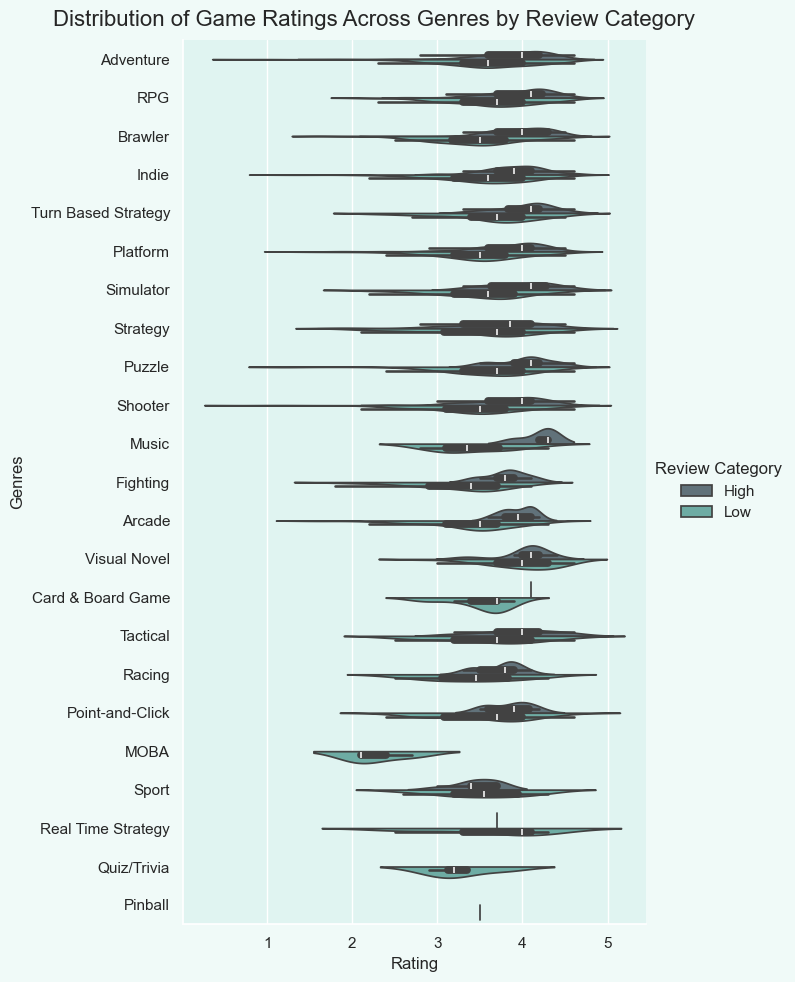

In [7]:
exploded_genres.reset_index(drop=True, inplace=True)

# Check for duplicate entries in the 'Genres' column
duplicate_genres = exploded_genres.duplicated(subset=['Genres', 'Title'], keep=False)
if duplicate_genres.any():
    print("Duplicates found. Review and consider removing or aggregating these entries.")
else:
    print("No duplicate genres for the same game found.")

# Attempt to recreate the catplot with the cleaned dataset
try:
    g = sns.catplot(
        data=exploded_genres,
        x='Rating',
        y='Genres',
        hue='Review Category',
        kind='violin',
        split=True,  # This splits the violin to show two halves
        height=10,
        aspect=0.7,
        palette=palette
    )
    g.fig.suptitle('Distribution of Game Ratings Across Genres by Review Category', fontsize=16)
    g.set_axis_labels('Rating', 'Genres')
    g.fig.subplots_adjust(top=0.95)  # Adjust the title to fit the figure properly
    plt.show()
except ValueError as e:
    print("Error:", e)

In [9]:

genre_summary = exploded_genres.groupby('Genres').agg(
    Average_Rating=('Rating', 'mean'),
    Median_Plays=('Plays', 'median'),
    Game_Count=('Genres', 'size'),
    Median_Review_Count=('Number of Reviews', 'median')
).reset_index()

# Format the average rating to two decimal places
genre_summary['Average_Rating'] = genre_summary['Average_Rating'].round(2)

# Sort genres by average rating for better readability
genre_summary.sort_values(by='Average_Rating', ascending=False, inplace=True)

genre_summary


,Genres,Average_Rating,Median_Plays,Game_Count,Median_Review_Count
22,Visual Novel,4.00,1700.0,71,402.0
21,Turn Based Strategy,3.89,5600.0,99,600.0
13,RPG,3.83,4100.0,514,603.5
11,Puzzle,3.80,3800.0,174,519.0
0,Adventure,3.77,4900.0,1005,643.0
2,Brawler,3.77,4200.0,157,647.0
20,Tactical,3.76,3300.0,50,419.0
5,Indie,3.70,3600.0,282,487.0
9,Platform,3.70,5100.0,329,674.0
16,Shooter,3.67,6100.0,351,632.0
